In [1]:
!pwd
import sys
sys.executable

/c/Users/shingo/jupyter_notebook/tfgpu_py36_work/02_keras_py/experiment/01_code_test


'C:\\Users\\shingo\\Anaconda3\\envs\\tfgpu20\\python.exe'

# tf_my_generator.pyテスト

In [2]:
# モジュールimport
import os, sys
current_dir = os.path.dirname(os.path.abspath("__file__"))
path = os.path.join(current_dir, '../../')
sys.path.append(path)
from transformer import tf_my_generator as my_generator
from dataset import util
%matplotlib inline
%reload_ext autoreload
%autoreload 2

out_dir = 'output_test'

In [4]:
import os, sys, glob, pathlib
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator

#img_dir = r"D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_100\train"
img_dir = r"D:\work\kaggle_data\Cats_VS._Dogs\images\small_set\train"
classes = sorted([pathlib.Path(d).name for d in glob.glob(img_dir+'\*')])
display(pd.DataFrame(classes))

shape = 331,331,3
batch_size = 30

gen = ImageDataGenerator(rescale = 1./255.)
#gen = ImageDataGenerator()
gen = gen.flow_from_directory(
        img_dir,
        target_size=(shape[0], shape[1]),
        color_mode='rgb',
        classes=classes,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True
    )

0
0  Cat
1  Dog

Found 1000 images belonging to 2 classes.


Num_Images:  30


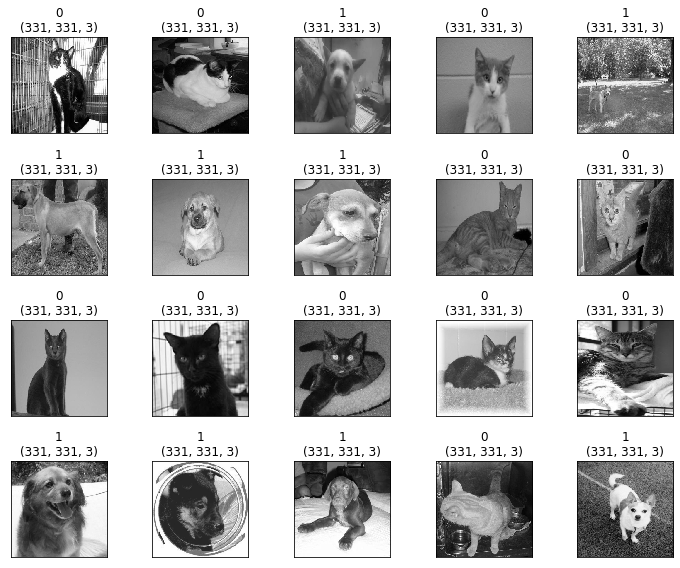

<Figure size 432x288 with 0 Axes>

In [9]:
custom_gen = my_generator.gray_generator(gen, p=1.0)

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Num_Images:  30


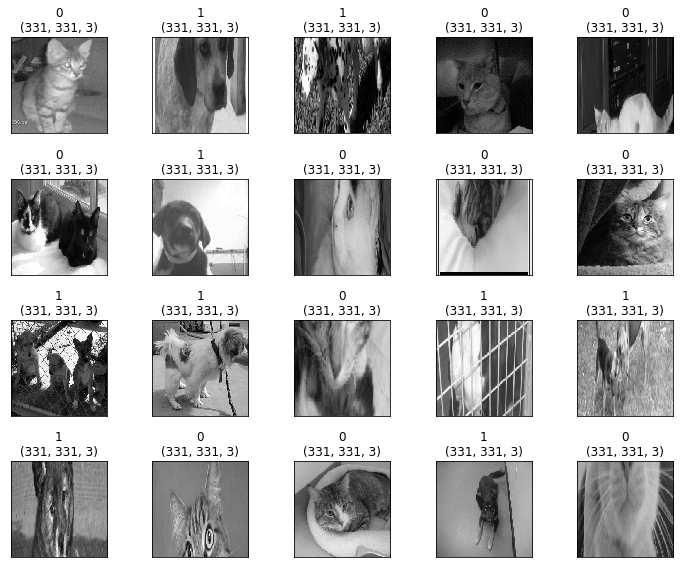

<Figure size 432x288 with 0 Axes>

In [10]:
custom_gen = my_generator.random_crop_generator(custom_gen, random_crop_size=[100,100])

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

Num_Images:  30


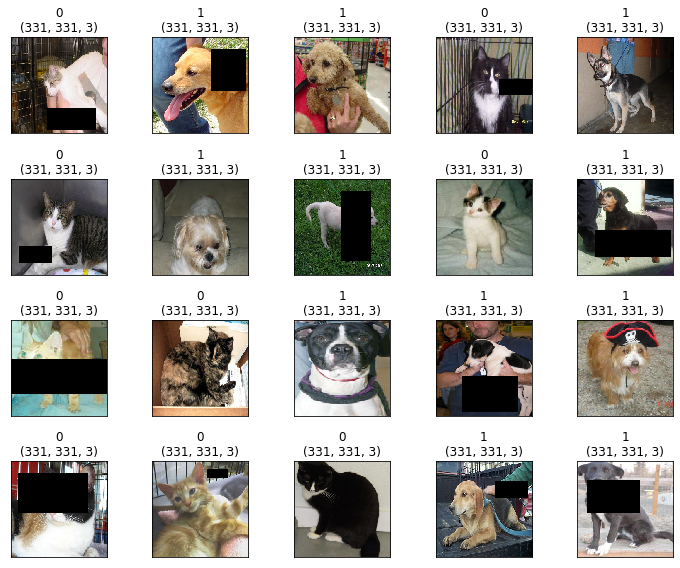

<Figure size 432x288 with 0 Axes>

In [11]:
custom_gen = my_generator.random_erasing_generator(gen, p=0.5)

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

Num_Images:  30


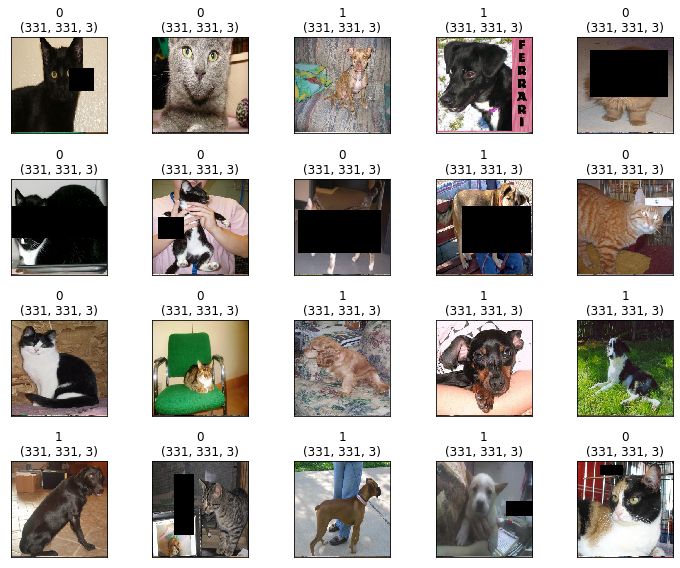

<Figure size 432x288 with 0 Axes>

In [7]:
custom_gen = my_generator.ricap_generator(custom_gen)

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

Num_Images:  30


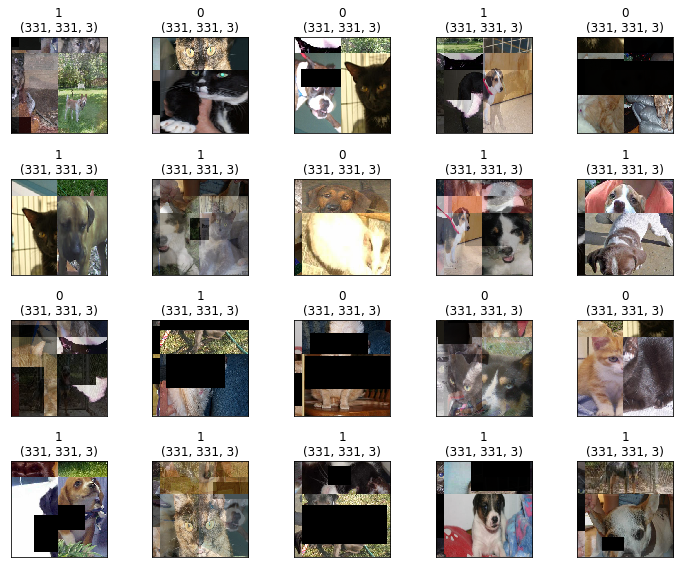

<Figure size 432x288 with 0 Axes>

In [8]:
custom_gen = my_generator.mixup_generator(custom_gen)

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

1.0
1.0
[0. 1.]
Num_Images:  30


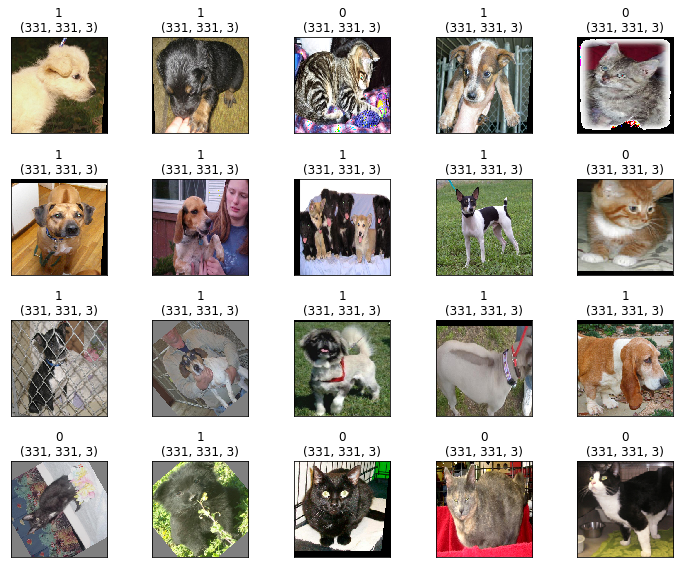

<Figure size 432x288 with 0 Axes>

In [9]:
custom_gen = my_generator.randaugment_generator(gen, N=3, M=4)

x,y = next(custom_gen)
print(np.max(x))
print(y[0])
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

255.0
[1. 0.]
Num_Images:  30


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


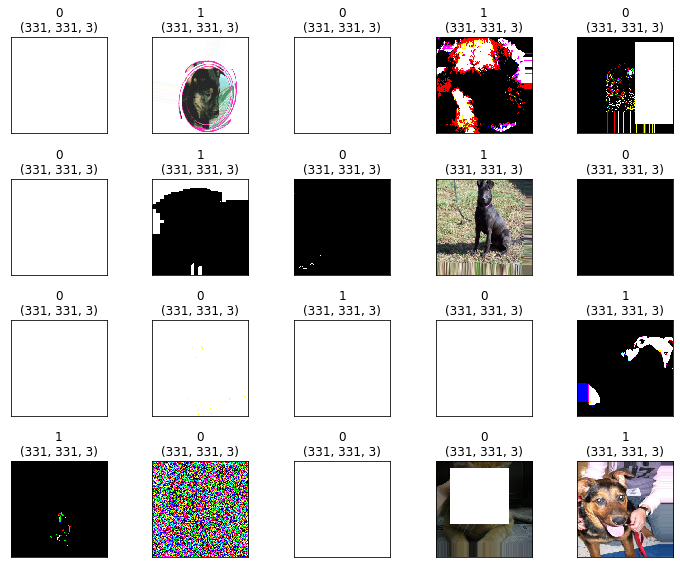

<Figure size 432x288 with 0 Axes>

In [10]:
custom_gen = my_generator.get_kuzushiji_generator(gen)

x,y = next(custom_gen)
print(np.max(x))
print(y[0])
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### MyImageDataGeneratorクラス確認

Found 1000 images belonging to 2 classes.
1.0
[0. 1.]
Num_Images:  30


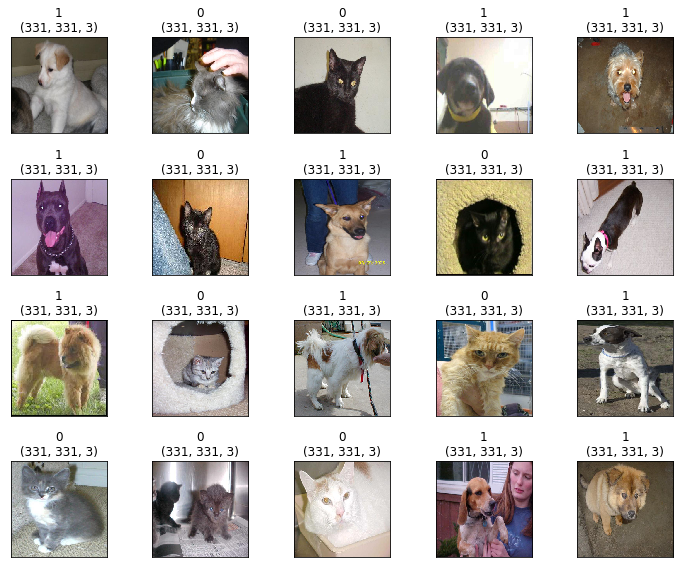

<Figure size 432x288 with 0 Axes>

In [24]:
my_IDG_options = {'rescale':1.0/255.0}
custom_gen = my_generator.MyImageDataGenerator(**my_IDG_options)

custom_gen = custom_gen.flow_from_directory(
        img_dir,
        target_size=(shape[0], shape[1]),
        color_mode='rgb',
        classes=classes,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True
    )

x,y = next(custom_gen)
print(np.max(x))
print(y[0])
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

Found 1000 images belonging to 2 classes.
1.0
[1. 0.]
Num_Images:  30


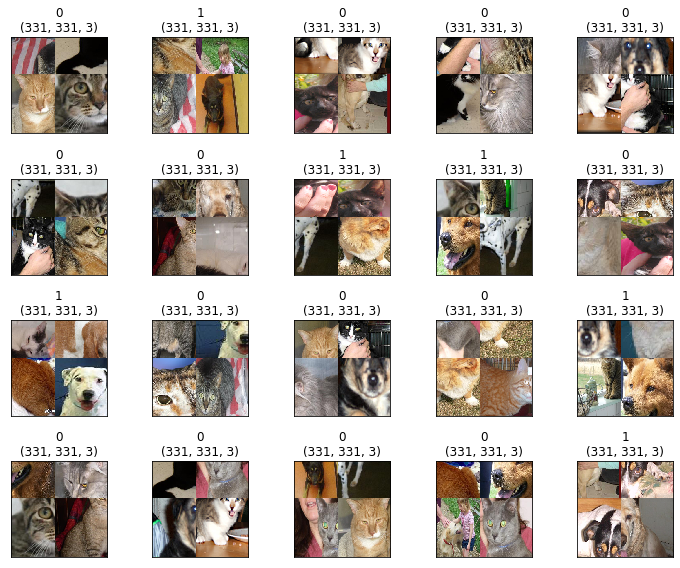

<Figure size 432x288 with 0 Axes>

In [34]:
my_IDG_options = {'rescale':1.0/255.0
                  #, 'is_kuzushiji_gen':True
                  #, 'grayscale_prob':0.5
                  #, 'random_crop':[24,112]
                  #, 'random_erasing_prob':0.5
                  #, 'mix_up_alpha':0.2
                  , 'ricap_beta':0.3
                  #, 'randaugment_N':14
                  #, 'randaugment_M':9
                 }
custom_gen = my_generator.MyImageDataGenerator(**my_IDG_options)

custom_gen = custom_gen.flow_from_directory(
        img_dir,
        target_size=(shape[0], shape[1]),
        color_mode='rgb',
        classes=classes,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True
    )

x,y = next(custom_gen)
print(np.max(x))
print(y[0])
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])